# 11월 24일 수 공부

In [1]:
# 분석 데이터 불러와서 데이터 확인
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/breast-cancer-wisconsin.csv')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
# 레이블 변수(유방암) 비율 확인
data['Class'].value_counts()



0    444
1    239
Name: Class, dtype: int64

In [3]:
# 행과 열 구조 확인
print(data.shape) 

'''
행 : 683
열 : 11
'''

(683, 11)


'\n행 : 683\n열 : 11\n'

In [5]:
# 방법1 : 컬럼 이름으로 나누는 방법
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]


In [6]:
# 방법2 : 컬럼 인덱스(위치값)으로 나누는 방법
X2 = data[data.columns[1:10]]

In [7]:
# 방법3 : loc로 나누는 방법
X3 = data.loc[: , 'Clump_Thickness':'Mitoses']

In [8]:
print("X1: ", X1.shape)
print("X2: ", X2.shape)
print("X3: ", X3.shape)

X1:  (683, 9)
X2:  (683, 9)
X3:  (683, 9)


In [9]:
# y 레이블
Y = data[['Class']]

In [12]:
# train-test 데이터셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,stratify = Y ,random_state=42)


In [13]:
# stratify = y 옵션 확인

# Y_train 의 0,1 비율 확인
print(Y_train.mean())

# Y_test 의 0,1 비율 확인
print(Y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


In [14]:
# 사이킷런 라이브러리에서 표준화 함수 임포트
from sklearn.preprocessing import StandardScaler
scaler_standard=StandardScaler() # 생략가능

In [15]:
# 사이킷런 라이브러리에서 MinMaxScaler 함수 임포트
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()

In [16]:
# train data의 정규화

#fit
scaler_minmax.fit(X_train)

#transform
X_scaled_minmax_train=scaler_minmax.transform(X_train)


In [17]:
# standard 정규화

#fit
scaler_standard.fit(X_train)

#transform
X_scaled_standard_train=scaler_standard.transform(X_train)

In [18]:
# minmax scale 확인
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# standard 방식 확인
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


In [20]:
# test data 를 standard로 정규화
X_scaled_standard_test=scaler_standard.transform(X_test)

#X_scaled_standard_test의 describe 확인
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


In [21]:
# test data minmax정규화

X_scaled_minmax_test=scaler_minmax.transform(X_test)

# X_scaled_minmax_test 기술통계량확인
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# 사이킷러너 라이브러리에서 선형회귀 중 로지스틱회귀 함수 임포트
from sklearn.linear_model import LogisticRegression

# model 지정
model=LogisticRegression() # 생략 가능

# model에 데이터 fit
model.fit(X_scaled_minmax_train, Y_train)

/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [23]:
# 예측치 구하기
pred_train = model.predict(X_scaled_minmax_train)


In [24]:
# 성능 구하기
model.score(X_scaled_minmax_train, Y_train)

0.97265625

In [25]:
# 사이킷러너 라이브러리에서 선형회귀 중 로지스틱회귀 함수 임포트
from sklearn.linear_model import LogisticRegression

# model 지정
model=LogisticRegression() # 생략 가능

# model에 데이터 fit
model.fit(X_scaled_minmax_test, Y_test)

/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [26]:
# 예측치 구하기
pred_test = model.predict(X_scaled_minmax_train)


In [27]:
# 성능 구하기
model.score(X_scaled_minmax_test, Y_test)

0.9473684210526315

## 혼동행렬

In [30]:
# sklearn 라이브러리의 metrics 라이브러리로 부터 confusion_matrix를 임포트
from sklearn.metrics import confusion_matrix

# confusion_matrix(y_train , pred_train)
confusion_train=confusion_matrix(Y_train, pred_train)

#confusion_matrix의 출력
# [[TP, FP
#   FN, TN ]] 형태
print("훈련 데이터 오차행렬 :\n", confusion_train)


훈련 데이터 오차행렬 :
 [[328   5]
 [  9 170]]


In [31]:
# sklearn.metrics 라이브러리의 classification_report 임포트
from sklearn.metrics import classification_report

# classification_report(y_train, pred_train)
cfreport_train=classification_report(Y_train,pred_train)

# 상세 지표 출력
print("분류예측 상세 레포트 : \n" , cfreport_train)

분류예측 상세 레포트 : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [34]:
# sklearn 라이브러리에서 roc_curve, auc 임포트
from sklearn.metrics import roc_curve, auc

# sklearn 라이브러리에서 metrics 임포트
from sklearn import metrics

# FP,TP,임계값(thresholds) 구하기 - roc_curve이용
# roc_curve(Y_test, model.decision_function(X_scaled_minmax_test))
# model.decision_function(X_scaled_minmax_test) : 모델은 LinearRegression() , decision_function : 결정함수 , 변수 : 정규화된 테스트 학습 데이터
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, model.decision_function(X_scaled_minmax_test))

# roc_auc
# metrics.roc_auc_score(Y_test, model.decision_function(X_scaled_minmax_test))
# model.decision_function(X_scaled_minmax_test) : 모델은 LinearRegression() , decision_function : 결정함수 , 변수 : 정규화된 테스트 학습 데이터
roc_auc = metrics.roc_auc_score(Y_test, model.decision_function(X_scaled_minmax_test))

roc_auc

0.9947447447447447

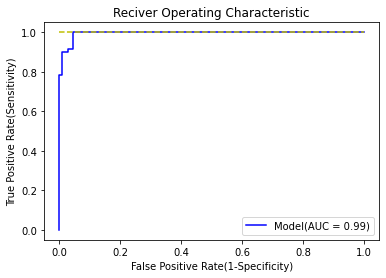

In [39]:
# matplotlib.pyplot 라이브러리에서 plt 임포트
import matplotlib.pyplot as plt

# plt.title : 도표 제목
plt.title("Reciver Operating Characteristic")

# plt.xlabel : X축 이름
plt.xlabel("False Positive Rate(1-Specificity)")

# plt.ylabel : y축 이름
plt.ylabel("True Positive Rate(Sensitivity)")

# 선 그리기 
# plt.plot(x축, y축, options)
# options - 'b' : blue
# options - label= ~~ : 우 하단 라벨
# options - 'y--' : yellow, 점선
# option - 'r--' : red, 점선
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model(AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[1,1],'r--')

# legend는 범례
plt.legend(loc='lower right')

#출력
plt.show()

In [40]:
# 학습데이터의 예측확률 컬럼을 생성하여 prob_train에 저장
prob_train = model.predict_proba(X_scaled_minmax_train)

# 이미 진행한 예측 범주를 Y_train 데이터 셋에 'y_pred'라는 변수로 추가하는 것
Y_train[['y_pred']]=pred_train

# 확률은 2개의 클래스가 생성됨.(0 과 1 ,정상과 환자). 이를 각각 y_prob0, y_prob1 변수에 집어넣음
Y_train[['y_prob0','y_prob1']]=prob_train

Y_train

<ipython-input-40-7baeac3a80c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train[['y_pred']]=pred_train
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-40-7baeac3a80c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Class,y_pred,y_prob0,y_prob1
131,0,0,0.962394,0.037606
6,0,0,0.907176,0.092824
0,0,0,0.948814,0.051186
269,0,0,0.973760,0.026240
56,1,1,0.594101,0.405899
...,...,...,...,...
515,1,1,0.090035,0.909965
216,1,0,0.923807,0.076193
312,1,1,0.427824,0.572176
11,0,0,0.974101,0.025899


In [42]:
prob_test=model.predict_proba(X_scaled_minmax_test)
Y_test[['y_pred']]=pred_test
Y_test[['y_proba0','y_proba1']]=prob_test
Y_test

<ipython-input-42-3d80558f3fd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test[['y_pred']]=pred_test


ValueError: Must have equal len keys and value when setting with an iterable

# 3. 머신러닝 맛보기2 : 회귀문제

## 3.1 분석 데이터 검토

In [44]:
import pandas as pd
data = pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/house_price.csv', encoding='utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [45]:
print(data.shape)

(17689, 6)


In [46]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

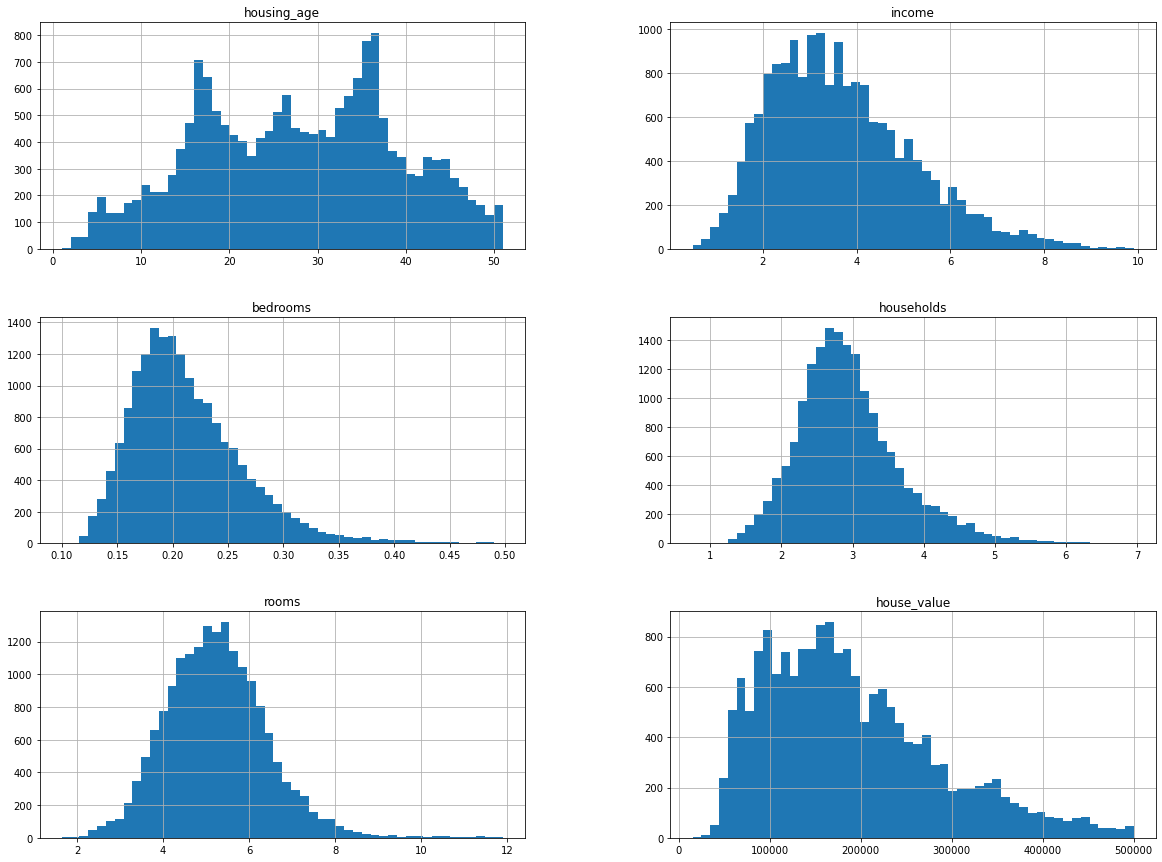

In [47]:
data.hist(bins=50, figsize=(20,15))

In [51]:
# 방법1
X1=data[['housing_age','income','bedrooms','households','rooms']]

# 방법2
X2=data[data.columns[0:5]]

# 방법3
X3=data.loc[:,'housing_age':'rooms']

In [52]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(17689, 5)
(17689, 5)
(17689, 5)


In [53]:
Y=data[['house_value']]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y,random_state=42)

In [57]:
# 학습 데이터와 테스트 데이터의 주택 가격 평균이 유사한지 확인
# 평균이 너무 다르면 비교하는데에 문제가 있기 때문에, 적당히 랜덤하게 잘 구분되었는지 확인하기 위함
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


## 3.4 정규화

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax=MinMaxScaler()
scaler_standard=StandardScaler()

In [59]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [61]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [63]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,5.615556e-18,1.588508e-16,7.827508e-16,-1.103026e-16,-3.708213e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


In [65]:
X_scaled_minmax_test=scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


In [66]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.014279,0.000196,-0.004814,0.040879,0.025222
std,1.013373,1.006675,0.984789,1.039304,1.018846
min,-2.342832,-2.081653,-1.864897,-2.593803,-3.049856
25%,-0.830678,-0.766493,-0.699423,-0.648287,-0.685507
50%,0.058824,-0.139666,-0.190013,-0.109012,-0.029221
75%,0.770426,0.592419,0.516912,0.563130,0.636293
max,2.104679,4.045937,5.352917,5.535878,5.641914


### 3.5 모델 학습

In [67]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [69]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5706921210926263

In [71]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5826083517811866

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error #
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61763.84882543206

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

46218.35635910518

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

3814773021.7308254

In [75]:
def MAPE(y_test,y_pred):
		return np.mean(np.abs((y_test - pred_test) / y_test)) * 100
MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

In [76]:
def MAE(y_test, y_pred) :
		return np.mean((y_test - pred_test) / y_test) * 100
MAE(y_test, pred_test)

house_value   -12.178049
dtype: float64

### 3.6 예측값 병합 및 저장

In [77]:
prob_train = model.predict(X_scaled_minmax_train)
y_train[['y_pred']]=prob_train
y_train

<ipython-input-77-d5e37dc3804c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[['y_pred']]=prob_train
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,house_value,y_pred
17235,56700,30143.543694
14220,101400,199835.492874
3280,271400,272103.037256
15279,88900,28899.099715
14727,95300,113477.567588
...,...,...
11284,142400,115628.685921
11964,134200,77955.022737
5390,225000,137618.822679
860,378200,255862.726626


In [78]:
prob_test = model.predict(X_scaled_minmax_test)
y_test[['y_pred']]=pred_test
y_test

<ipython-input-78-cb0ea721696d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[['y_pred']]=pred_test
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,house_value,y_pred
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [79]:
Total_test = pd.concat([X_test,y_test], axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [80]:
Total_test.to_csv('regression_test.csv')

# 4. 머신러닝 프로세스1 : 범주형 변수의 변환

## 4.1 데이터 범주-연속-레이블로 나누기

In [81]:
import pandas as pd
data=pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/vote.csv', encoding='utf-8')
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


#### 데이터에서 범주형 변수는?
##### gender , region
#### -> 원핫인코딩의 대상은 gender, region.
#### -> 따라서 범주형 변수와 기타 변수들을 X1 과 XY로 나눔!

In [82]:
X1 = data[['gender','region']]
XY = data[['edu','income','age','score_gov','score_progress','score_intention','vote','parties']]


In [83]:
X1['gender'].value_counts()

1    139
2     72
Name: gender, dtype: int64

In [85]:
X1['region'].value_counts()

1    126
4     29
5     20
3     19
2     17
Name: region, dtype: int64

In [86]:
# 범주형 변수의 숫자로된 케이스값을 문자로 바꾼다!
X1['gender'] = X1['gender'].replace([1,2],['male','female'])
X1['region'] = X1['region'].replace([1,2,3,4,5],['Sudo','Chungcheng','Honam','Youngnam','Others'])

<ipython-input-86-021a84383a7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['gender'] = X1['gender'].replace([1,2],['male','female'])
<ipython-input-86-021a84383a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['region'] = X1['region'].replace([1,2,3,4,5],['Sudo','Chungcheng','Honam','Youngnam','Others'])


In [87]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [89]:
# get_dummies

X1_dum = pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheng,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


### 4.3 자료 통합 및 저장하기

In [90]:
# 자료 통합 
Fvote=pd.concat([X1_dum, XY], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheng,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [91]:
# 저장
Fvote.to_csv('Fvote.csv', index=False, sep=',', encoding='utf-8')

# 5. 머신러닝 프로세스2 : 데이터셋 분할과 모델검증

## 5.1 특성치(X), 레이블(Y) 나누기

In [92]:
import pandas as pd
data=pd.read_csv('/Users/yerim/Desktop/빅데이터분석기사/BigData_data_최종본(1022)/Fvote.csv',encoding='utf-8')
data.head()

,gender_female,gender_male,region_Chungcheng,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender_female      211 non-null    int64  
 1   gender_male        211 non-null    int64  
 2   region_Chungcheng  211 non-null    int64  
 3   region_Honam       211 non-null    int64  
 4   region_Others      211 non-null    int64  
 5   region_Sudo        211 non-null    int64  
 6   region_Youngnam    211 non-null    int64  
 7   edu                211 non-null    int64  
 8   income             211 non-null    int64  
 9   age                211 non-null    int64  
 10  score_gov          211 non-null    int64  
 11  score_progress     211 non-null    int64  
 12  score_intention    211 non-null    float64
 13  vote               211 non-null    int64  
 14  parties            211 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 24.9 KB


In [94]:
data.columns

Index(['gender_female', 'gender_male', 'region_Chungcheng', 'region_Honam',
       'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income',
       'age', 'score_gov', 'score_progress', 'score_intention', 'vote',
       'parties'],
      dtype='object')

In [97]:
# 방법1 : 특성 이름으로 데이터 셋 나누기
X = data[['gender_female', 'gender_male', 'region_Chungcheng', 'region_Honam',
       'region_Others', 'region_Sudo', 'region_Youngnam']]

# 방법2 : 특성 위치값으로 특성 데이터 셋 나누기
X = data[data.columns[0:7]]

# 방법3 : loc 함수로 특성 데이터 나누기
X = data.loc[:,'gender_female':'region_Youngnam']

In [102]:
y=data[['vote']]

## 5.2 train-test 데이터셋 나누기

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [105]:
# 데이터셋 행렬 구조 확인
print(X_train.shape)
print(X_test.shape)

(158, 7)
(53, 7)


In [106]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [107]:
# 랜덤 없는 교차 검증 : cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("5개 테스트 셋 정확도 :" , scores)
print("정확도 평균:", scores.mean())

5개 테스트 셋 정확도 : [0.625      0.6875     0.71875    0.70967742 0.70967742]
정확도 평균: 0.6901209677419355


/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [108]:
# 랜덤 있는 교차 검증 : K-Fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5 , shuffle=True, random_state=42)
score= cross_val_score(model, X_train, y_train, cv=kfold)
print("5개 폴드의 정확도:", scores)

5개 폴드의 정확도: [0.625      0.6875     0.71875    0.70967742 0.70967742]


/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [110]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, random_state=42)
score=cross_val_score(model, X_train, y_train, cv=shuffle_split)
print("교차검증 정확도 : ", scores)

교차검증 정확도 :  [0.625      0.6875     0.71875    0.70967742 0.70967742]


/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/yerim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

## 5.4 train-validity-test 분할과 교차검증

In [111]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


In [112]:
X_train, X_valid , y_train, y_valid = train_test_split(X_train, y_train, random_state=42)